# HOMEWORK PART 3

For the Lorenz equations, consider the following.

1. Train a NN to advance the solution from $t$ to $t + \Delta t$ for $\rho$ = 10,28 and 35. 
2. Now see how well your NN works for future state prediction for $\rho$ = 17 and $\rho$ = 40

Let's consider the Lorentz system of Equations:

\begin{gather*}
x' = \sigma (y - x) \\
y' = x (r - z) -y \\
z' = xy -bz
\end{gather*}

In [102]:
import numpy as np

import matplotlib.pyplot as plt

from scipy.integrate import solve_ivp

from tensorflow import keras
from keras import layers

from Utility.Lorenz import lorenz_deriv

integrator_keywords = {}
integrator_keywords['rtol'] = 1e-12
integrator_keywords['method'] = 'LSODA' # Probably works also with 'RK45' LSODA well suited for cahotic systems
integrator_keywords['atol'] = 1e-12

plt.style.use('science')

In [131]:
dt = 0.01
T = 8
t = np.arange(0, T+dt, dt)
beta = 8/3
sigma = 10
rho = [10, 28, 35]

nn_input_10 = np.zeros((100*(len(t)-1),3))
nn_input_28 = np.zeros((100*(len(t)-1),3))
nn_input_35 = np.zeros((100*(len(t)-1),3))

nn_output_10 = np.zeros_like(nn_input_10)
nn_output_28 = np.zeros_like(nn_input_28)
nn_output_35 = np.zeros_like(nn_input_35)

x0 = -15 + 30 * np.random.random((100, 3))

x_t_10 = np.asarray([solve_ivp(lorenz_deriv,
                    [t[0], t[-1]],
                    x0_j,
                    t_eval = t,
                    args=(sigma, beta, rho[0]),
                    **integrator_keywords).y.T for x0_j in x0])

x_t_28 = np.asarray([solve_ivp(lorenz_deriv,
                    [t[0], t[-1]],
                    x0_j,
                    t_eval = t,
                    args=(sigma, beta, rho[1]),
                    **integrator_keywords).y.T for x0_j in x0])

x_t_35 = np.asarray([solve_ivp(lorenz_deriv,
                    [t[0], t[-1]],
                    x0_j,
                    t_eval = t,
                    args=(sigma, beta, rho[2]),
                    **integrator_keywords).y.T for x0_j in x0])

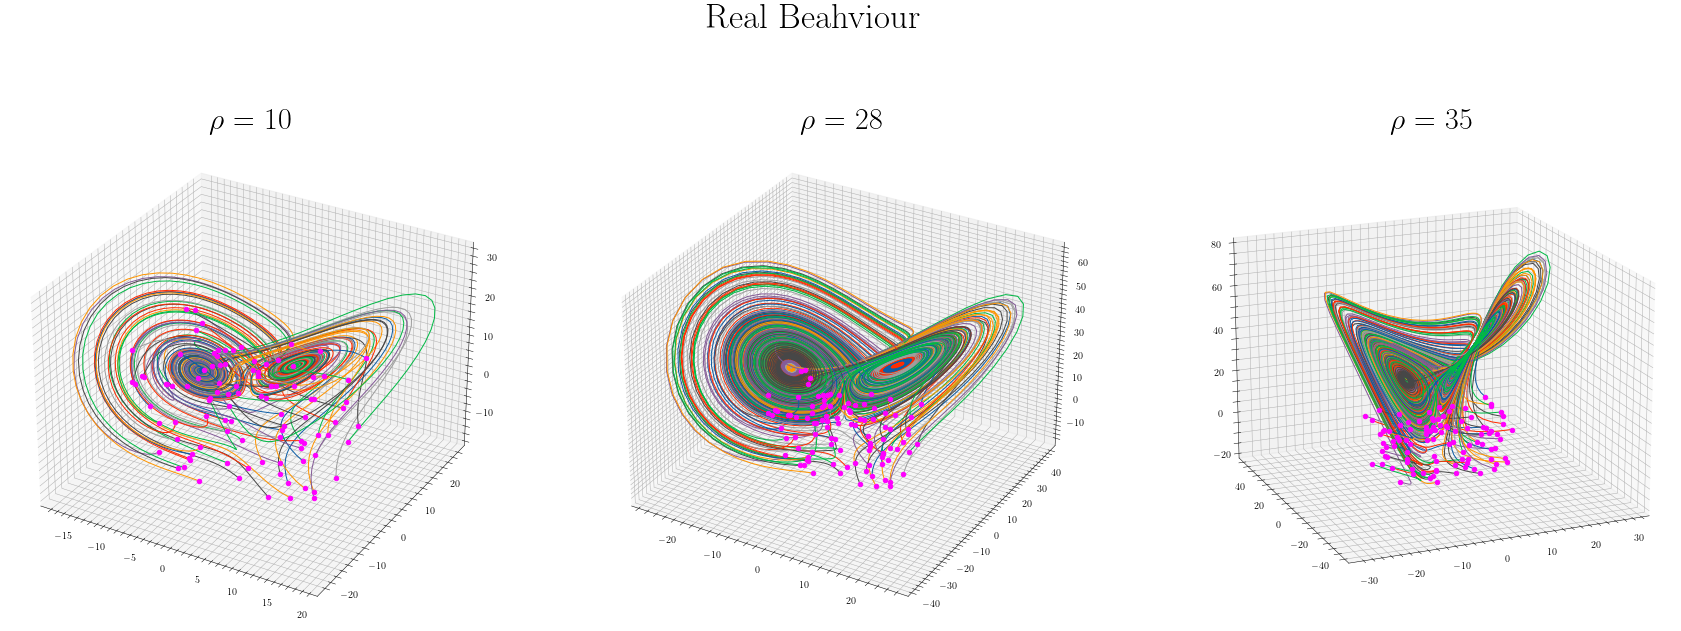

In [132]:
fig= plt.figure(figsize=(30, 11))

plt.suptitle('Real Beahviour', fontsize = 35)
ax = fig.add_subplot(1,3,1, projection='3d')
for j in range(100):

    x10, y10, z10 = x_t_10[j, :, :].T
    ax.set_title('$\\rho$ = 10', fontsize = 30)
    ax.plot(x10, y10, z10,linewidth=1)
    ax.scatter3D(x0[j,0],x0[j,1],x0[j,2],color='magenta')

    nn_input_10[j*(len(t)-1):(j+1)*(len(t)-1),:] = x_t_10[j,:-1,:]
    nn_output_10[j*(len(t)-1):(j+1)*(len(t)-1),:] = x_t_10[j,1:,:]

ax = fig.add_subplot(1,3,2, projection='3d')
for j in range(100):
    
    x28, y28, z28 = x_t_28[j, :, :].T
    ax.set_title('$\\rho$ = 28', fontsize = 30)
    ax.plot(x28, y28, z28,linewidth=1)
    ax.scatter3D(x0[j,0],x0[j,1],x0[j,2],color='magenta')

    nn_input_28[j*(len(t)-1):(j+1)*(len(t)-1),:] = x_t_28[j,:-1,:]
    nn_output_28[j*(len(t)-1):(j+1)*(len(t)-1),:] = x_t_28[j,1:,:]

ax = fig.add_subplot(1,3,3, projection='3d')
for j in range(100):
    
    x35, y35, z35 = x_t_35[j, :, :].T
    ax.set_title('$\\rho$ = 35', fontsize = 30)
    ax.plot(x35, y35, z35,linewidth=1)
    ax.scatter3D(x0[j,0],x0[j,1],x0[j,2],color='magenta')

    nn_input_35[j*(len(t)-1):(j+1)*(len(t)-1),:] = x_t_35[j,:-1,:]
    nn_output_35[j*(len(t)-1):(j+1)*(len(t)-1),:] = x_t_35[j,1:,:]
    
ax.view_init(18, -113)
fig.savefig('Figures/InitialLorenz.pdf', format='pdf', dpi=1200)
plt.show()

## Building and Training the Neural Networks

In [84]:
NN10 = keras.models.Sequential()
NN10.add(layers.Dense(10, input_dim=3, activation='sigmoid'))
NN10.add(layers.Dense(10, activation='relu'))
NN10.add(layers.Dense(3, activation='linear'))

NN10.compile(loss='mse', optimizer='adam')

History10 = NN10.fit(nn_input_10, nn_output_10, epochs=400, use_multiprocessing=True) 

Epoch 1/400
2500/2500 [==============================] - 5s 2ms/step - loss: 5.5469
Epoch 2/400
2500/2500 [==============================] - 4s 2ms/step - loss: 0.4429
Epoch 3/400
2500/2500 [==============================] - 4s 2ms/step - loss: 0.1454
Epoch 4/400
2500/2500 [==============================] - 4s 2ms/step - loss: 0.0532
Epoch 5/400
2500/2500 [==============================] - 4s 2ms/step - loss: 0.0282
Epoch 6/400
2500/2500 [==============================] - 3s 1ms/step - loss: 0.0170
Epoch 7/400
2500/2500 [==============================] - 4s 2ms/step - loss: 0.0116
Epoch 8/400
2500/2500 [==============================] - 3s 1ms/step - loss: 0.0089
Epoch 9/400
2500/2500 [==============================] - 3s 1ms/step - loss: 0.0073
Epoch 10/400
2500/2500 [==============================] - 4s 2ms/step - loss: 0.0064
Epoch 11/400
2500/2500 [==============================] - 4s 1ms/step - loss: 0.0056
Epoch 12/400
2500/2500 [==============================] - 4s 2ms/step - lo

In [85]:
num_traj = 3

nn_flow_10 = np.zeros((num_traj, len(t), 3))
nn_flow_10[:, 0, :] = -15 + 30 * np.random.random((num_traj, 3))
for jj, tval in enumerate(t[:-1]):
  nn_flow_10[:, jj+1, :] = NN10.predict(nn_flow_10[:, jj, :])

1/1 [==============================] - 0s 17ms/step


In [86]:
NN28 = keras.models.Sequential()
NN28.add(layers.Dense(10, input_dim=3, activation='sigmoid'))
NN28.add(layers.Dense(10, activation='relu'))
NN28.add(layers.Dense(3, activation='linear'))

NN28.compile(loss='mse', optimizer='adam')

History = NN28.fit(nn_input_28, nn_output_28, epochs=400) 

Epoch 1/400
2500/2500 [==============================] - 3s 1ms/step - loss: 46.3315
Epoch 2/400
2500/2500 [==============================] - 3s 1ms/step - loss: 2.1634
Epoch 3/400
2500/2500 [==============================] - 3s 1ms/step - loss: 0.5325
Epoch 4/400
2500/2500 [==============================] - 3s 1ms/step - loss: 0.2659
Epoch 5/400
2500/2500 [==============================] - 3s 1ms/step - loss: 0.1538
Epoch 6/400
2500/2500 [==============================] - 3s 1ms/step - loss: 0.0897
Epoch 7/400
2500/2500 [==============================] - 3s 1ms/step - loss: 0.0588
Epoch 8/400
2500/2500 [==============================] - 3s 1ms/step - loss: 0.0430
Epoch 9/400
2500/2500 [==============================] - 3s 1ms/step - loss: 0.0353
Epoch 10/400
2500/2500 [==============================] - 3s 1ms/step - loss: 0.0301
Epoch 11/400
2500/2500 [==============================] - 4s 1ms/step - loss: 0.0264
Epoch 12/400
2500/2500 [==============================] - 4s 1ms/step - l

In [87]:
num_traj = 3

nn_flow_28 = np.zeros((num_traj, len(t), 3))
nn_flow_28[:, 0, :] = -15 + 30 * np.random.random((num_traj, 3))
for jj, tval in enumerate(t[:-1]):
  nn_flow_28[:, jj+1, :] = NN28.predict(nn_flow_28[:, jj, :])

1/1 [==============================] - 0s 15ms/step


In [88]:
NN35 = keras.models.Sequential()
NN35.add(layers.Dense(10, input_dim=3, activation='sigmoid'))
NN35.add(layers.Dense(10, activation='relu'))
NN35.add(layers.Dense(3, activation='linear'))

NN35.compile(loss='mse', optimizer='adam')

History = NN35.fit(nn_input_35, nn_output_35, epochs=400) 

Epoch 1/400
2500/2500 [==============================] - 2s 836us/step - loss: 65.3306
Epoch 2/400
2500/2500 [==============================] - 2s 833us/step - loss: 4.1087
Epoch 3/400
2500/2500 [==============================] - 2s 842us/step - loss: 1.1579
Epoch 4/400
2500/2500 [==============================] - 2s 854us/step - loss: 0.5662
Epoch 5/400
2500/2500 [==============================] - 2s 836us/step - loss: 0.3384
Epoch 6/400
2500/2500 [==============================] - 2s 830us/step - loss: 0.2385
Epoch 7/400
2500/2500 [==============================] - 2s 835us/step - loss: 0.1816
Epoch 8/400
2500/2500 [==============================] - 2s 831us/step - loss: 0.1459
Epoch 9/400
2500/2500 [==============================] - 2s 833us/step - loss: 0.1227
Epoch 10/400
2500/2500 [==============================] - 2s 858us/step - loss: 0.1057
Epoch 11/400
2500/2500 [==============================] - 2s 829us/step - loss: 0.0941
Epoch 12/400
2500/2500 [===========================

In [89]:
num_traj = 3

nn_flow_35 = np.zeros((num_traj, len(t), 3))
nn_flow_35[:, 0, :] = -15 + 30 * np.random.random((num_traj, 3))
for jj, tval in enumerate(t[:-1]):
  nn_flow_35[:, jj+1, :] = NN35.predict(nn_flow_35[:, jj, :])

1/1 [==============================] - 0s 24ms/step


## Comparing Nets predictions

In [133]:
x_t_10 = np.asarray([solve_ivp(lorenz_deriv, 
                    [t[0], t[-1]],
                    nn_flow_10[i, 0, :], 
                    t_eval=t,
                    args=(sigma, beta, rho[0]),
                    **integrator_keywords).y.T for i in range(num_traj)])

x_t_28 = np.asarray([solve_ivp(lorenz_deriv, 
                    [t[0], t[-1]],
                    nn_flow_28[i, 0, :], 
                    t_eval=t,
                    args=(sigma, beta, rho[1]),
                    **integrator_keywords).y.T for i in range(num_traj)])

x_t_35 = np.asarray([solve_ivp(lorenz_deriv, 
                    [t[0], t[-1]],
                    nn_flow_35[i, 0, :], 
                    t_eval=t,
                    args=(sigma, beta, rho[2]),
                    **integrator_keywords).y.T for i in range(num_traj)])

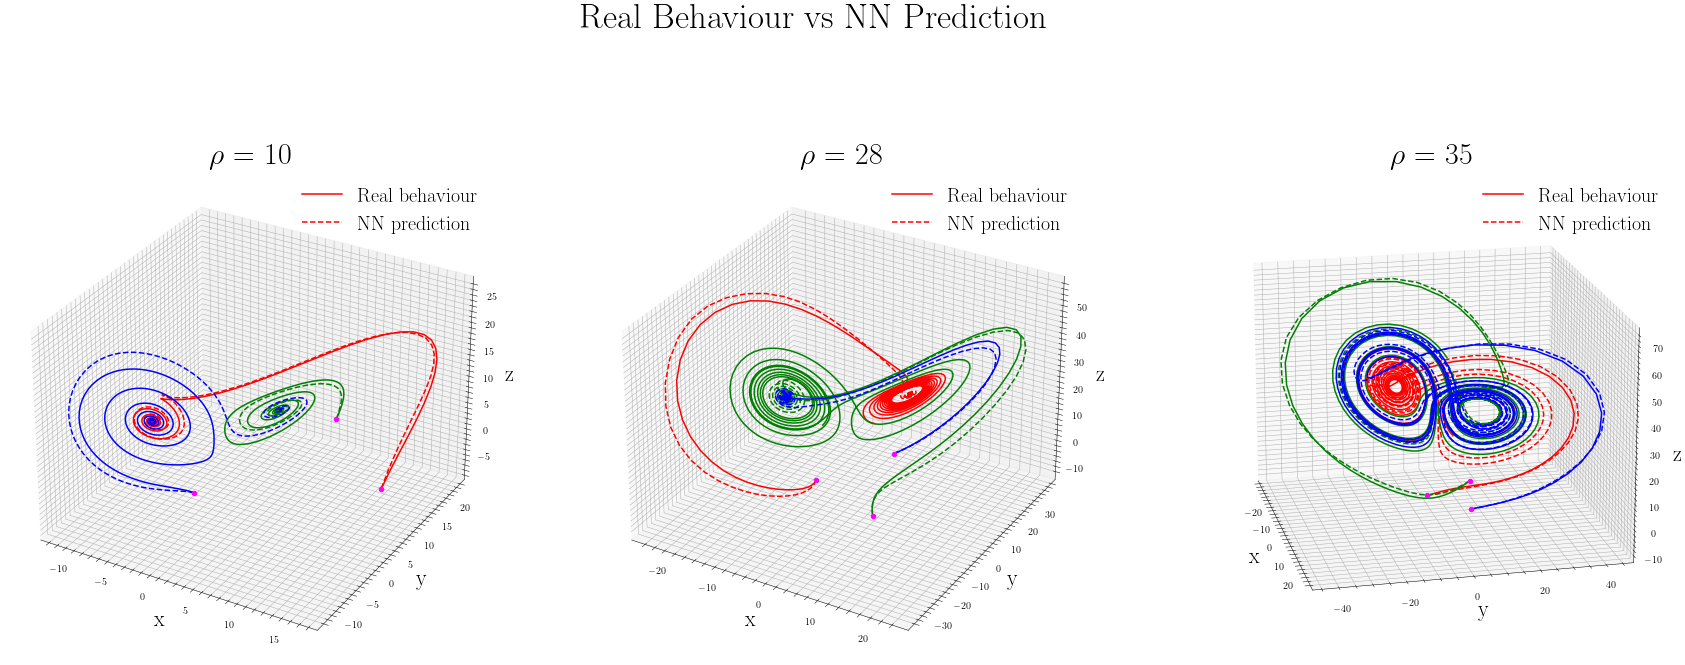

In [134]:
fig= plt.figure(figsize=(30, 12))
plt.suptitle('Real Behaviour vs NN Prediction', fontsize = 35)
colors = ['red', 'green', 'blue']

ax = fig.add_subplot(1,3,1, projection='3d')
for j in range(num_traj):
    x, y, z = x_t_10[j, :, :].T
    xd, yd, zd = nn_flow_10[j, :, :].T
    ax.set_title('$\\rho$ = 10', fontsize = 30)
    ax.plot(x, y, z, linewidth=1.5, color=colors[j])
    ax.plot(xd, yd, zd, '--', lw=1.5, color=colors[j])
    ax.set_xlabel('x', fontsize=22)
    ax.set_ylabel('y', fontsize=22)
    ax.set_zlabel('z', fontsize=22)
    ax.scatter(x[0], y[0], z[0], color='magenta')
    plt.legend(['Real behaviour', 'NN prediction'], fontsize = 20)

ax = fig.add_subplot(1,3,2, projection='3d')
for j in range(num_traj):
    x, y, z = x_t_28[j, :, :].T
    xd, yd, zd = nn_flow_28[j, :, :].T
    ax.set_title('$\\rho$ = 28', fontsize = 30)
    ax.plot(x, y, z, linewidth=1.5, color=colors[j])
    ax.plot(xd, yd, zd, '--', lw=1.5, color=colors[j])
    ax.set_xlabel('x', fontsize=22)
    ax.set_ylabel('y', fontsize=22)
    ax.set_zlabel('z', fontsize=22)
    ax.scatter(x[0], y[0], z[0], color='magenta')
    plt.legend(['Real behaviour', 'NN prediction'], fontsize = 20)

ax = fig.add_subplot(1,3,3, projection='3d')
for j in range(num_traj):
    x, y, z = x_t_35[j, :, :].T
    xd, yd, zd = nn_flow_35[j, :, :].T
    ax.set_title('$\\rho$ = 35', fontsize = 30)
    ax.plot(x, y, z, linewidth=1.5, color=colors[j])
    ax.plot(xd, yd, zd, '--', lw=1.5, color=colors[j])
    ax.set_xlabel('x', fontsize=22)
    ax.set_ylabel('y', fontsize=22)
    ax.set_zlabel('z', fontsize=22)
    ax.scatter(x[0], y[0], z[0], color='magenta')
    plt.legend(['Real behaviour', 'NN prediction'], fontsize = 20)
             
ax.view_init(18, -13)
fig.savefig('Figures/Lorenz3dcomparison.pdf', format='pdf', dpi=1200)
plt.show()

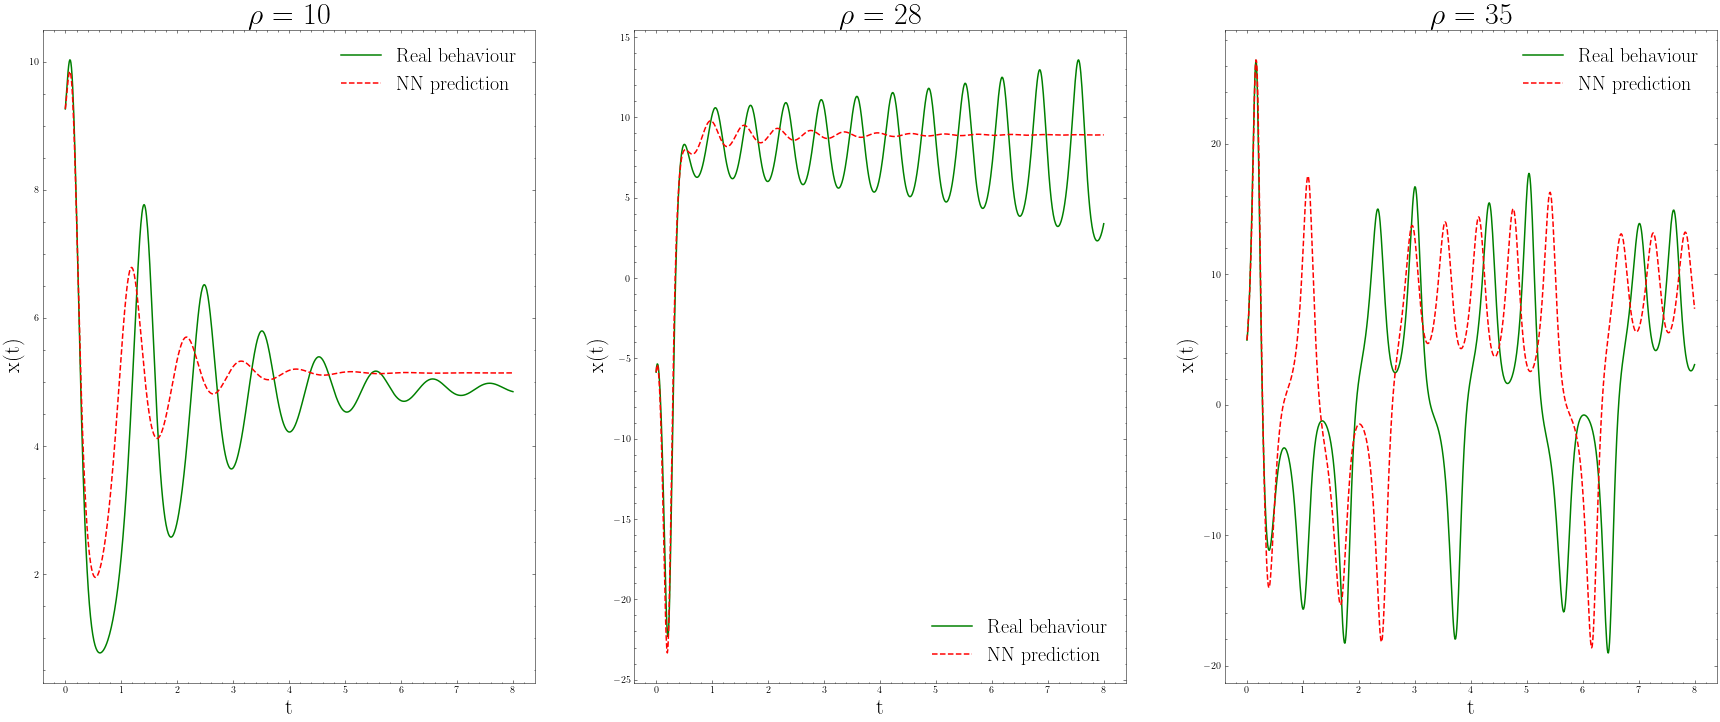

In [135]:
fig= plt.figure(figsize=(30, 12))
colors = ['red', 'green', 'blue']

ax = fig.add_subplot(1,3,1)

x, y, z = x_t_10[1, :, :].T
xd, yd, zd = nn_flow_10[1, :, :].T
ax.set_title('$\\rho$ = 10', fontsize = 30)
ax.plot(t, x, linewidth=1.5, color=colors[1])
ax.plot(t, xd, '--', lw=1.5, color=colors[0])
ax.set_xlabel('t', fontsize=22)
ax.set_ylabel('x(t)', fontsize=22)
plt.legend(['Real behaviour', 'NN prediction'], fontsize = 20)

ax = fig.add_subplot(1,3,2)
x, y, z = x_t_28[0, :, :].T
xd, yd, zd = nn_flow_28[0, :, :].T
ax.set_title('$\\rho$ = 28', fontsize = 30)
ax.plot(t, x, linewidth=1.5, color=colors[1])
ax.plot(t, xd, '--', lw=1.5, color=colors[0])
ax.set_xlabel('t', fontsize=22)
ax.set_ylabel('x(t)', fontsize=22)
plt.legend(['Real behaviour', 'NN prediction'], fontsize = 20)


ax = fig.add_subplot(1,3,3)
x, y, z = x_t_35[2, :, :].T
xd, yd, zd = nn_flow_35[2, :, :].T
ax.set_title('$\\rho$ = 35', fontsize = 30)
ax.plot(t, x, linewidth=1.5, color=colors[1])
ax.plot(t, xd, '--', lw=1.5, color=colors[0])
ax.set_xlabel('t', fontsize=22)
ax.set_ylabel('x(t)', fontsize=22)
plt.legend(['Real behaviour', 'NN prediction'], fontsize = 20)
fig.savefig('Figures/Lorenz2dcomparison.pdf', format='pdf', dpi=1200)
plt.show()

## See how well your NN works for future state prediction for $\rho$ = 17 and $\rho$ = 40

In [138]:
dt = 0.01
T = 8
t = np.arange(0, T+dt, dt)
beta = 8/3
sigma = 10
rho = [17, 40]

nn_input_17 = np.zeros((100*(len(t)-1),3))
nn_input_40 = np.zeros((100*(len(t)-1),3))

nn_output_17 = np.zeros_like(nn_input_17)
nn_output_40 = np.zeros_like(nn_input_40)

num_traj = 3

x_t_17 = np.asarray([solve_ivp(lorenz_deriv, 
                    [t[0], t[-1]],
                    nn_flow_10[i, 0, :], 
                    t_eval=t,
                    args=(sigma, beta, rho[0]),
                    **integrator_keywords).y.T for i in range(num_traj)])

x_t_40 = np.asarray([solve_ivp(lorenz_deriv, 
                    [t[0], t[-1]],
                    nn_flow_35[i, 0, :], 
                    t_eval=t,
                    args=(sigma, beta, rho[1]),
                    **integrator_keywords).y.T for i in range(num_traj)])

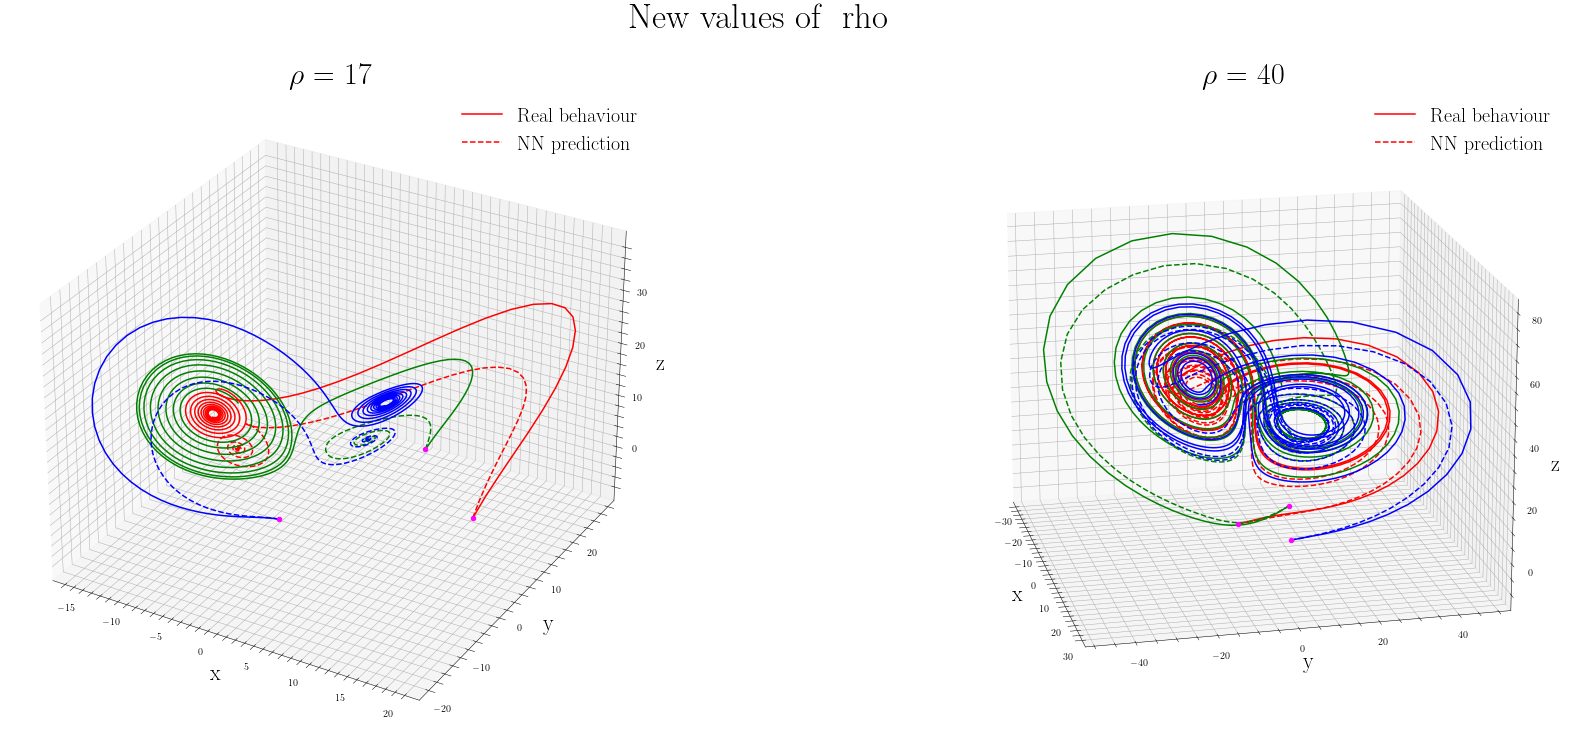

In [139]:
fig= plt.figure(figsize=(30, 12))
plt.suptitle('New values of \ rho ', fontsize = 35)
colors = ['red', 'green', 'blue']

ax = fig.add_subplot(1,2,1, projection='3d')
for j in range(num_traj):
    x, y, z = x_t_17[j, :, :].T
    xd, yd, zd = nn_flow_10[j, :, :].T
    ax.set_title('$\\rho$ = 17', fontsize = 30)
    ax.plot(x, y, z, linewidth=1.5, color=colors[j])
    ax.plot(xd, yd, zd, '--', lw=1.5, color=colors[j])
    ax.set_xlabel('x', fontsize=22)
    ax.set_ylabel('y', fontsize=22)
    ax.set_zlabel('z', fontsize=22)
    ax.scatter(x[0], y[0], z[0], color='magenta')
    plt.legend(['Real behaviour', 'NN prediction'], fontsize = 20)

ax = fig.add_subplot(1,2,2, projection='3d')
for j in range(num_traj):
    x, y, z = x_t_40[j, :, :].T
    xd, yd, zd = nn_flow_35[j, :, :].T
    ax.set_title('$\\rho$ = 40', fontsize = 30)
    ax.plot(x, y, z, linewidth=1.5, color=colors[j])
    ax.plot(xd, yd, zd, '--', lw=1.5, color=colors[j])
    ax.set_xlabel('x', fontsize=22)
    ax.set_ylabel('y', fontsize=22)
    ax.set_zlabel('z', fontsize=22)
    ax.scatter(x[0], y[0], z[0], color='magenta')
    plt.legend(['Real behaviour', 'NN prediction'], fontsize = 20)

ax.view_init(18, -13)
fig.savefig('Figures/Lorenz3dcomparison_new.pdf', format='pdf', dpi=1200)
plt.show()

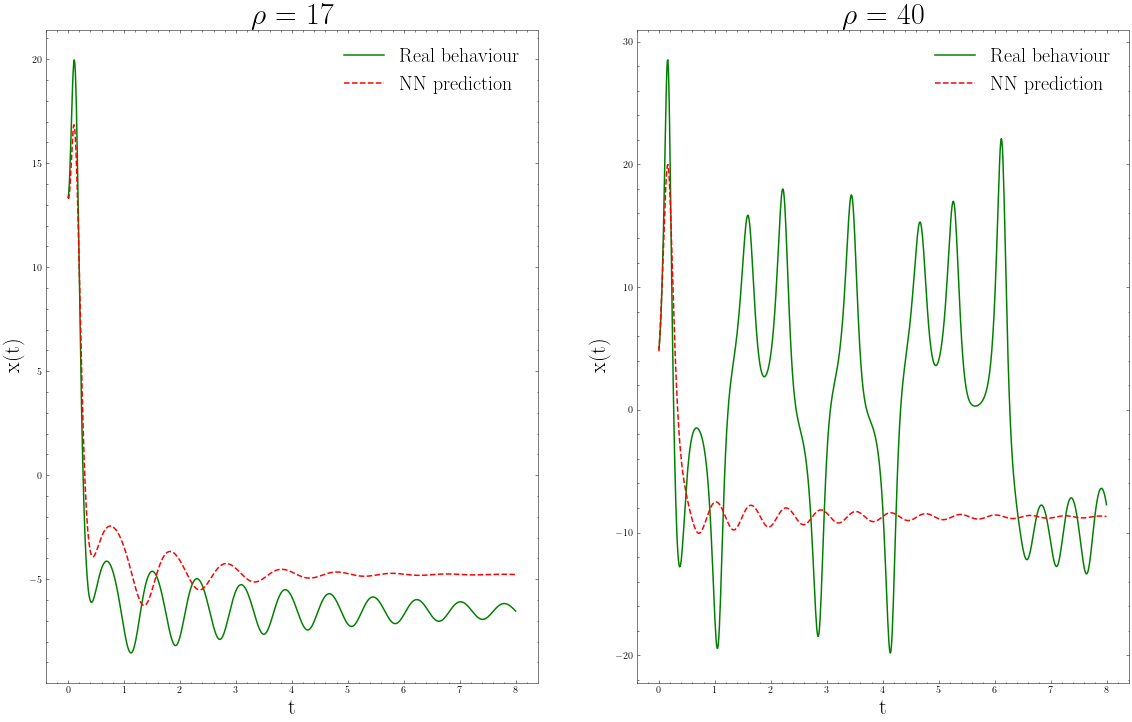

In [143]:
fig= plt.figure(figsize=(30, 12))
colors = ['red', 'green', 'blue']

ax = fig.add_subplot(1,3,1)

x, y, z = x_t_17[0, :, :].T
xd, yd, zd = nn_flow_10[0, :, :].T
ax.set_title('$\\rho$ = 17', fontsize = 30)
ax.plot(t, x, linewidth=1.5, color=colors[1])
ax.plot(t, xd, '--', lw=1.5, color=colors[0])
ax.set_xlabel('t', fontsize=22)
ax.set_ylabel('x(t)', fontsize=22)
plt.legend(['Real behaviour', 'NN prediction'], fontsize = 20)

ax = fig.add_subplot(1,3,2)
x, y, z = x_t_40[2, :, :].T
xd, yd, zd = nn_flow_28[2, :, :].T
ax.set_title('$\\rho$ = 40', fontsize = 30)
ax.plot(t, x, linewidth=1.5, color=colors[1])
ax.plot(t, xd, '--', lw=1.5, color=colors[0])
ax.set_xlabel('t', fontsize=22)
ax.set_ylabel('x(t)', fontsize=22)
plt.legend(['Real behaviour', 'NN prediction'], fontsize = 20)
fig.savefig('Figures/Lorenz2dcomparison_new.pdf', format='pdf', dpi=1200)
plt.show()